<a href="https://colab.research.google.com/github/evangelav/Machine_Learning/blob/main/BIN3100_ML_S9_R%C3%A9seau_de_Neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIN3100 ML S9 : Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de comprendre les vidéos suivantes :

1.   [BINV3100 2 IA 1 Introduction au réseau de neurones et deep-learning](https://www.youtube.com/watch?v=CNJ942E7UyQ)
2.   [BINV3100 2 IA 2 Réseau de neurones](https://www.youtube.com/watch?v=FIfByp7qc90)
3.   [BINV3100 2 IA 3 Régression sur PyTorch](https://www.youtube.com/watch?v=Fnjj2QBpUM4)
4.   [BINV3100 2 IA 3 Classification sur PyTorch](https://www.youtube.com/watch?v=cOMagXizAtk)
5.   [BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

#Partie 1: Exercices relatifs aux Vidéos 

[BINV3100 2 IA 5 Enoncé exercices](https://www.youtube.com/watch?v=Y95L3CJZ5TQ)

**Nous utilisons pas encore le GPU, il ne faut pas changer le runtime**

Merci de commenter un maximum votre code.

Notation :

Exercice 1 (sur 4):
- Layer ok et bons paramètres
- Bonne forward pass / calcul de loss / retropropagation du gradient
- Bonne accuracy sur le test (100% escompté)
- Divers (bonne gestion de type, bonne création de batch, bon arrêt d'entrainement, tracking de la training loss)


Exercice 2 (sur 2) :
- Bonne modification du réseau
- Bonne accuracy sur le test (100% escompté)

Exercice 3 (sur 2):
- Bonne déclaration de la classe Network
- Bonne modification de optimizer et de la forward pass

Exercice 4 (sur 2):
- Bonne déclaration de la classe Dataset
- Bon calcul de l'accuracy 

Bonus (2 points):
- Exercice 4: plot de l'évolution de la training loss par epoch
- Un truc cool qui va au dela des énnoncés (merci de le dire explicitement dans cette cellule pour que je le trouve facilement)



## **Exercice 1 : Classification linéaire**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

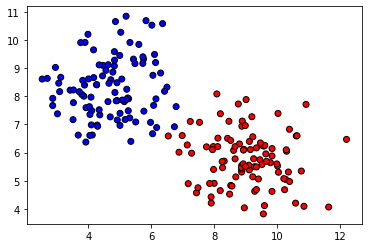

In [ ]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, center_box=(0, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')

In [ ]:
# Procédure pour générer un batch
def batch(X,y,batch_size):
  #X,y sont les features et target dont on veut prendre un batch de taille batch size
  #Attention !! X et y doivent être des array numpy et batch, batch y en seront aussi
  batch_x = []
  batch_y = []
  indices = []
  while (len(indices)<batch_size) :
    random_index = randrange(len(X))
    if (not random_index in indices):
      batch_x.append(np.array(X[random_index]))
      batch_y.append(np.array(y[random_index]))
      indices.append(random_index)
  return batch_x,batch_y

In [32]:
import torch
import torch.nn as nn
import numpy as np
from random import randrange
import torch.optim as optim

## Créez les layers ici 
layer1 = nn.Linear(2, 3)
layer2 = nn.Linear(3, 2)


# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03 
epochs = 5000
# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train selon https://playground.tensorflow.org/

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5)

# Procédure de training cad 
# 1) boucle d'entrainement avec création de batch aléatoire en utilisant la fonction batch
# 2) prediction du reseau (forward pass) 
# 3) calcul de la loss 
# 4) rétropropagation du gradient 
# 5) tracking de la training loss
# 6) Si vous avez une bonne training loss, vous utilisez break



ancien_loss = 0;
#boucle d'entrainement
for i in range(epochs):
  X_alea = []
  y_alea = []
  #Création de batch
  for k in range(batch_size):
    point_random = randrange(X_train.shape[0])
    X_alea.append(np.array(X_train[point_random]))
    y_alea.append(np.array(y_train[point_random]))

  X_alea_tensor = torch.from_numpy(np.array(X_alea, dtype=np.float32))
  y_alea_tensor = torch.from_numpy(np.array(y_alea))

  #forward pass
  optimizer.zero_grad()
  out = layer1(X_alea_tensor)
  out = layer2(out)
  loss = loss_func(out, y_alea_tensor)

  #backward pass
  loss.backward()
  optimizer.step()

  #tracking de la training loss
  

output_test = layer1(torch.from_numpy(np.array(X_test, dtype=np.float32)))
output_test = layer2(output_test).data.cpu().numpy()
best_cluster = np.argmax(output_test, axis=1)
print("Accuracy : ", np.mean(best_cluster == y_test)*100)
# Quand le modèle a convergé, on calcule l'accuracy sur le test. 
# Ici, il n'est pas nécéssaire de créer des batch, on peut tout envoyer dans le réseau en une fois
# ne pas utiliser de fonction sklearn, calculez l'accuracy vous même avec np.argmax


Accuracy :  46.0


## **Exercice 2 : Classification non-linéaire**

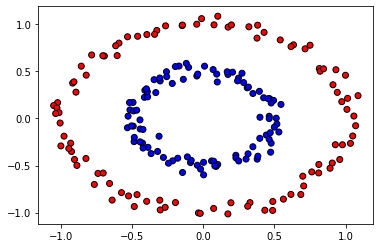

In [ ]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')
plt.show()


In [34]:
# Modifiez votre reseau (la couche intermédiaire) pour obtenir 100% sur ce dataset



## Créez les layers ici 
layer1 = nn.Linear(2,4)
tanh = nn.Tanh()
layer2 = nn.Linear(4,2)
# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
batch_size = 10
learning_rate = 0.03
epochs= 10000
# Déclarez la loss et l'optimisation (SGD)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# Training
for i in range(epochs):
  X_alea = []
  y_alea = []
  #Création de batch
  for k in range(batch_size):
    point_random = randrange(X_train.shape[0])
    X_alea.append(np.array(X_train[point_random]))
    y_alea.append(np.array(y_train[point_random]))

  X_alea_tensor = torch.from_numpy(np.array(X_alea, dtype=np.float32))
  y_alea_tensor = torch.from_numpy(np.array(y_alea))
  #forward pass
  optimizer.zero_grad()
  out = tanh(layer1(X_alea_tensor))
  out = layer2(out)
  loss = loss_func(out, y_alea_tensor)

  #backward pass
  loss.backward()
  optimizer.step()
# Eval sur test
output_test = tanh(layer1(torch.from_numpy(np.array(X_test, dtype=np.float32))))
output_test = layer2(output_test).data.cpu().numpy()
best_cluster = np.argmax(output_test, axis=1)
print("Accuracy : ", np.mean(best_cluster == y_test)*100)

Accuracy :  100.0


## **Exercice 3 : Network class**

Vous allez recoder l'exercice 2 en ajoutant deux modifications: <br/>
1)
Pour l'instant, on traite nos couches séparément, et non comme un "block" unifié. Par exemple, il faut donner les parametres de chaque couche a l'optimizer (par exemple : `optim.SGD(list(layer1.parameters())+list(layer2.parameters()), lr=learning_rate`)

Allez sur ce lien et regardez comment définir une classe pour votre réseau (https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html). Utilisez la et modifiez votre ligne de l'optimiseur ainsi que la gestion de votre forward pass.

2)
Imaginez qu'on ait 1000 couches, ce n'est pas pratique des les appeler une par une lors de la forward pass. Utilisez la fonction suivante pour palier au problème :
https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html

In [36]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

# Classe Network
class Network(nn.Module):
  #layers = liste des dimensions des couches
  def __init__(self, layers):
    super(Network, self).__init__()
    self.module_list = nn.ModuleList([nn.Linear(i, o) for i,o in zip(layers, layers[1:])])
    #site
    self.tanh = nn.Tanh()

  def forward(self, X):
    for i,layer in enumerate(self.module_list):
      if i < len(self.module_list)-1:
        out = self.tanh(layer(X))
      else:
        out = layer(out)
    return out
# Copiez collez votre solution en modifiant l'otim.SGD et la forward pass

batch_size = 10
learning_rate = 0.03
epochs= 10000
# Déclarez la loss et l'optimisation (SGD)
layers = [2, 4, 2]
model = Network(layers)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Split test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# Training
for i in range(epochs):
  X_alea = []
  y_alea = []
  #Création de batch
  for k in range(batch_size):
    point_random = randrange(X_train.shape[0])
    X_alea.append(np.array(X_train[point_random]))
    y_alea.append(np.array(y_train[point_random]))

  X_alea_tensor = torch.from_numpy(np.array(X_alea, dtype=np.float32))
  y_alea_tensor = torch.from_numpy(np.array(y_alea))
  #forward pass
  optimizer.zero_grad()
  out = tanh(layer1(X_alea_tensor))
  out = layer2(out)
  loss = loss_func(out, y_alea_tensor)

  #backward pass
  loss.backward()
  optimizer.step()
# Eval sur test
output_test = tanh(layer1(torch.from_numpy(np.array(X_test, dtype=np.float32))))
output_test = layer2(output_test).data.cpu().numpy()
best_cluster = np.argmax(output_test, axis=1)
print("Accuracy : ", np.mean(best_cluster == y_test)*100)


Accuracy :  100.0


## **Exercice 4 : Dataloader**

En général, il est compliqué de créer soi même ses batchs, surtout si le dataset devient complexe. Nous allons utiliser un dataloader de pytorch, qui lui même crée les batch. Lisez **seulement la section "dataset" de cette ressource** :https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel#dataset et créer votre classe dataset. Voici une esquisse de code pour vous aider :

In [41]:
import torch

X, y = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=1)

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, y):
        # a completer
        self.X = X
        self.y = y

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select one sample at position index
        # Return in type : np.array

        # a compléter
        x = np.array(self.X[index], dtype=np.float32)
        y = np.array(self.y[index])

        return x, y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
train_dataset = Dataset(X_train, y_train)
test_dataset = Dataset(X_test, y_test)

training_generator = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_generator = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

print('Train set length', len(train_dataset))
print('Test set length', len(test_dataset))
layers = [2, 4, 2]
net = Network(layers)

# Déclarez les parametres de l'expérience (batch_size, learning rate, ...)
# Déclarez la loss et l'optimisation (SGD)
batch_size = 10
learning_rate = 0.03
epochs = 10000

loss_func = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

for i in range(epochs):
  for j, sample in enumerate(training_generator):
    x, y = sample # Generator automatically transform it to tensor
    # A compléter
    
    #forward pass
    optimizer.zero_grad()
    out = net(x)
    loss = loss_func(out, y)

    #backward pass
    loss.backward()
    optimizer.step()


accuracy = []
for j, sample in enumerate(test_generator):
  x, y = sample # Generator automatically transform it to tensor
  # A compléter
  output_test = net(x).data.cpu().numpy()
  best_cluster = np.argmax(output_test, axis=1)
  accuracy.append(np.mean(best_cluster == y.data.cpu().numpy())*100)

print('\n Accuracy is ' , np.mean(accuracy))


Train set length 100
Test set length 100

 Accuracy is  100.0
